In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

plt.style.use('guide.mplstyle')

plot_kwargs = { 'markersize': 3, 'marker': '^', 'linestyle': '' }

In [14]:
coefficients = pd.read_csv('rucinski-coefficients.csv', delimiter=',')
deltas = pd.read_csv('rucinski-depths.csv', delimiter=',')
coefficient_columns = ['0.00', '1.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00', '8.00', '9.00', '10.00']

f=1.0
i=87.5
q=0.3

coefficients['coeff'] = coefficients[coefficient_columns].values.tolist()
coeff = coefficients[coefficients.q == q][coefficients.i == i][coefficients.f == f]['coeff'].tolist()[0]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [15]:

times = np.linspace(0, 360, 360)

def f(x, c):
   f = np.array([a * np.cos(2.0 * np.pi * i * x) for i, a in enumerate(c)])
   return f.sum()
    
y = np.array([f(t / 360.0, coeff).real for t in times])

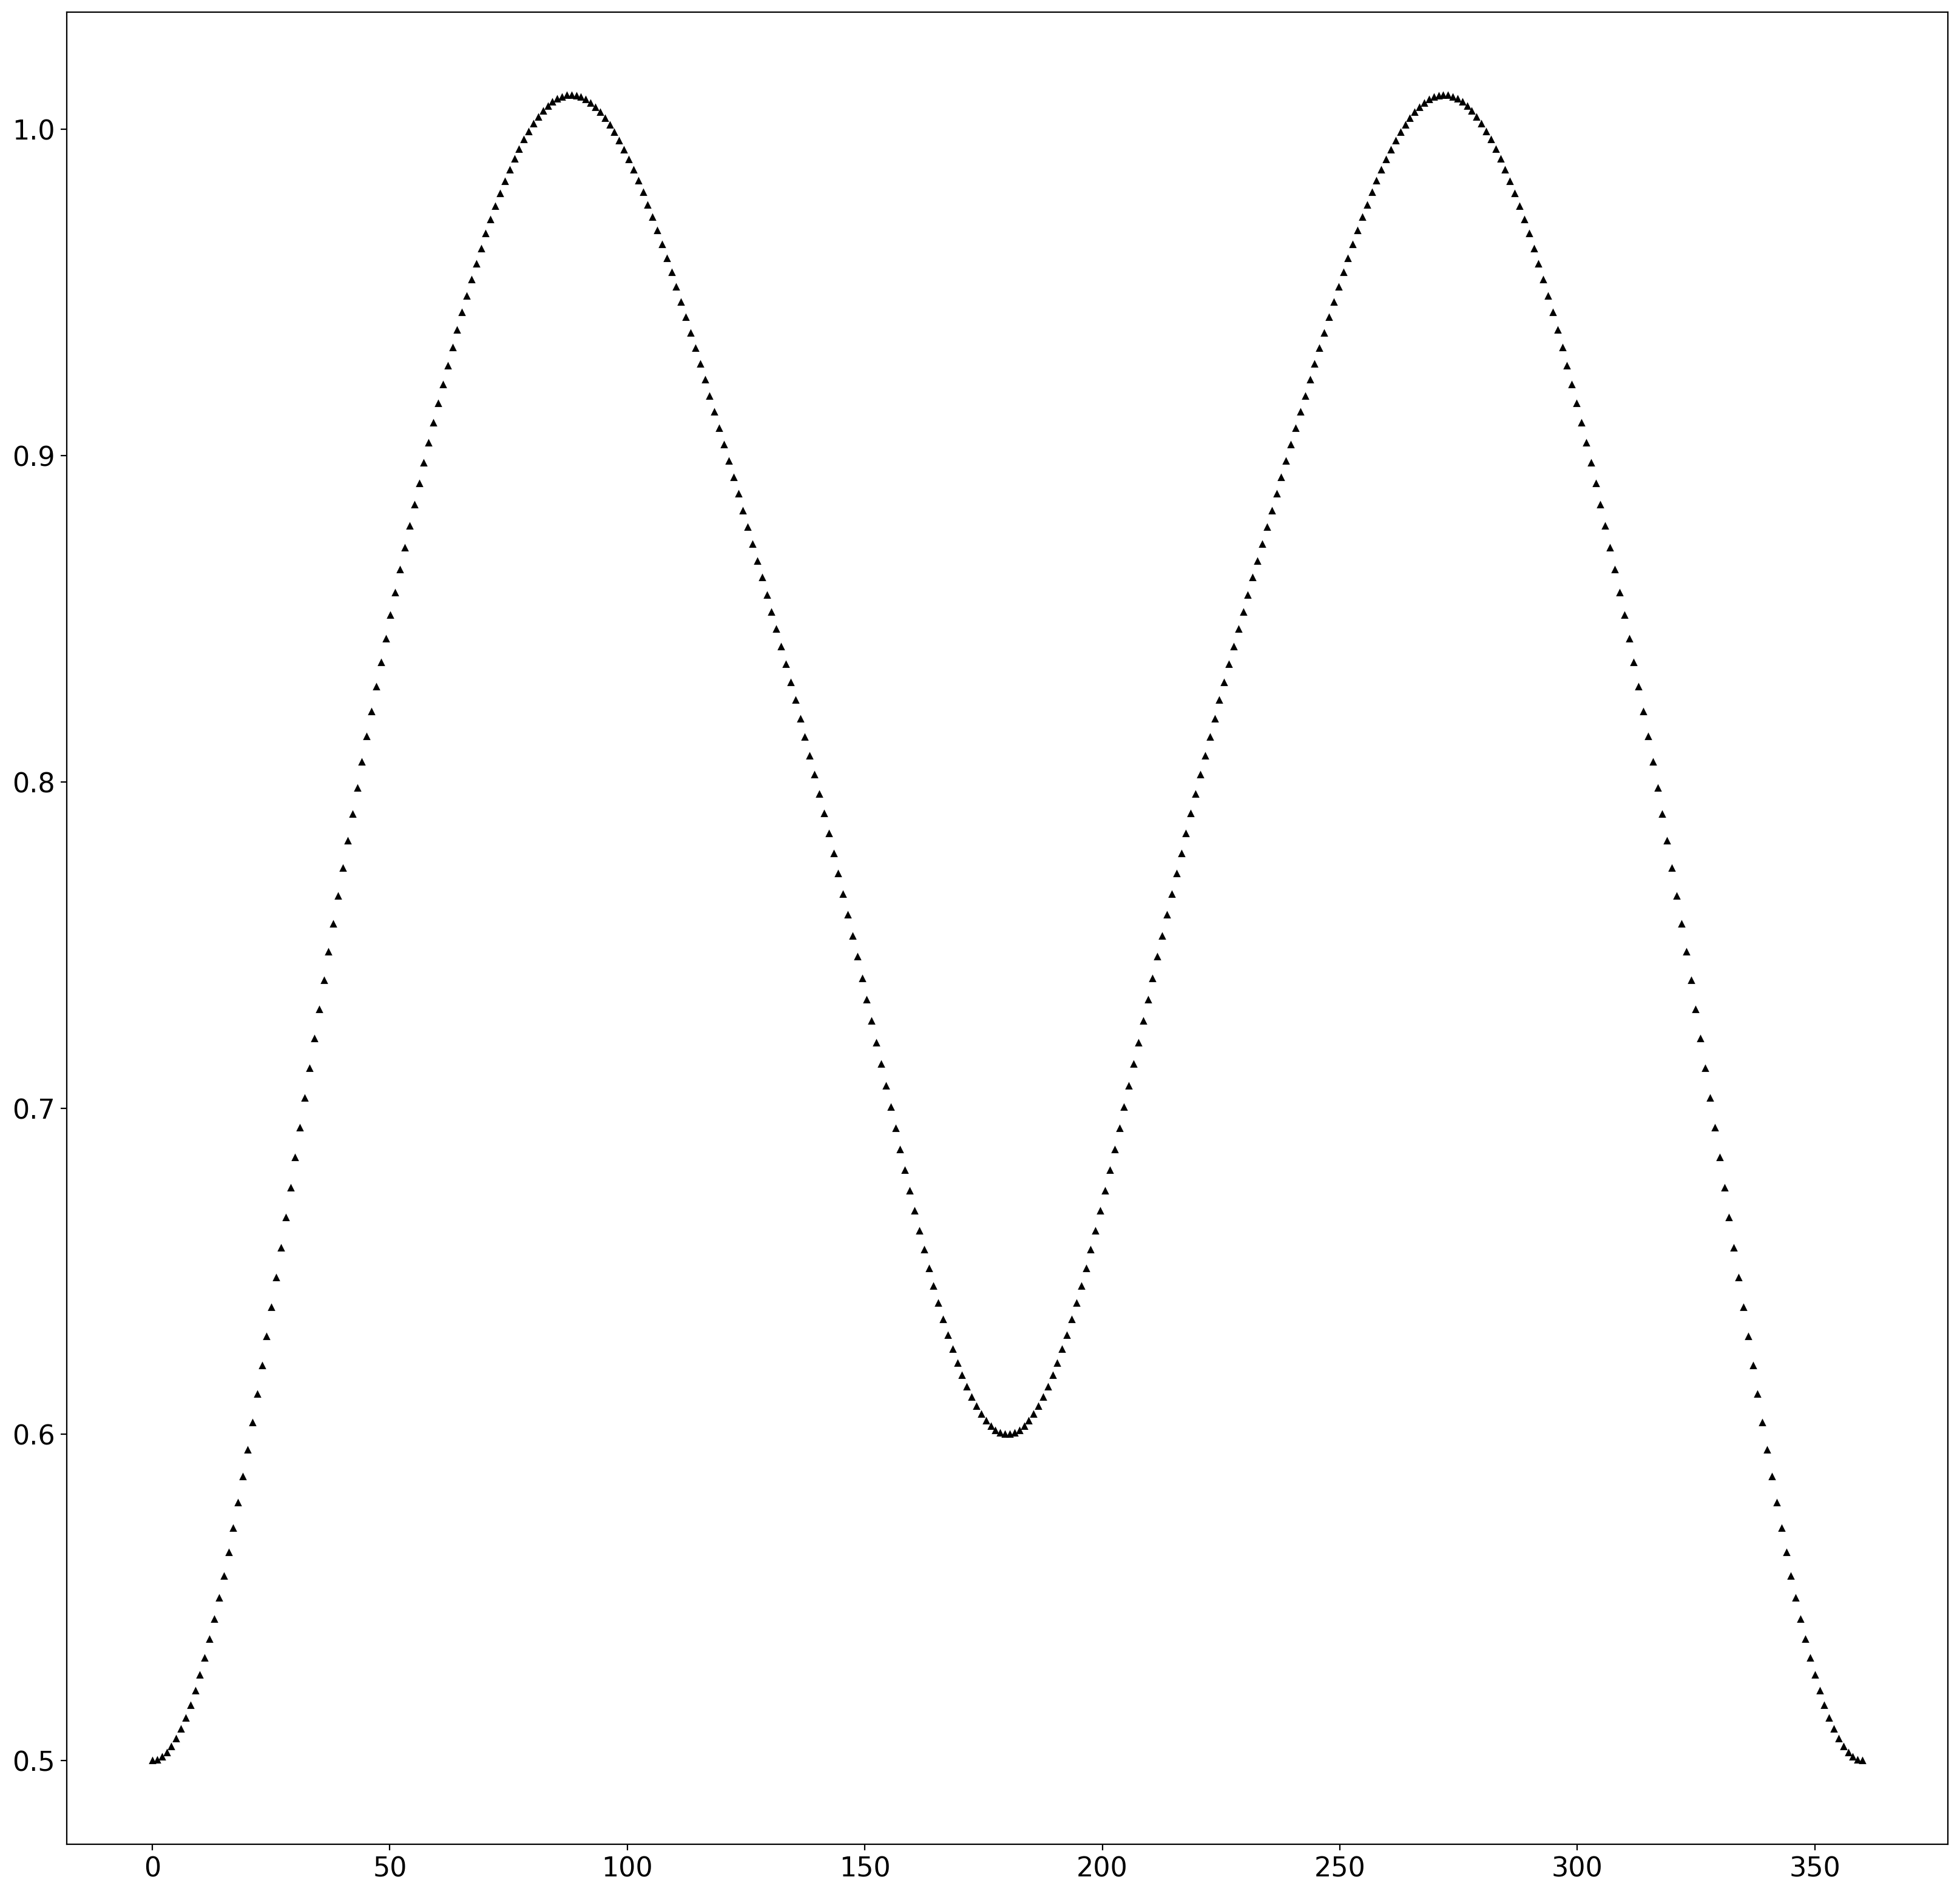

In [16]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111)
ax1.plot(times, y, 'k.', **plot_kwargs)

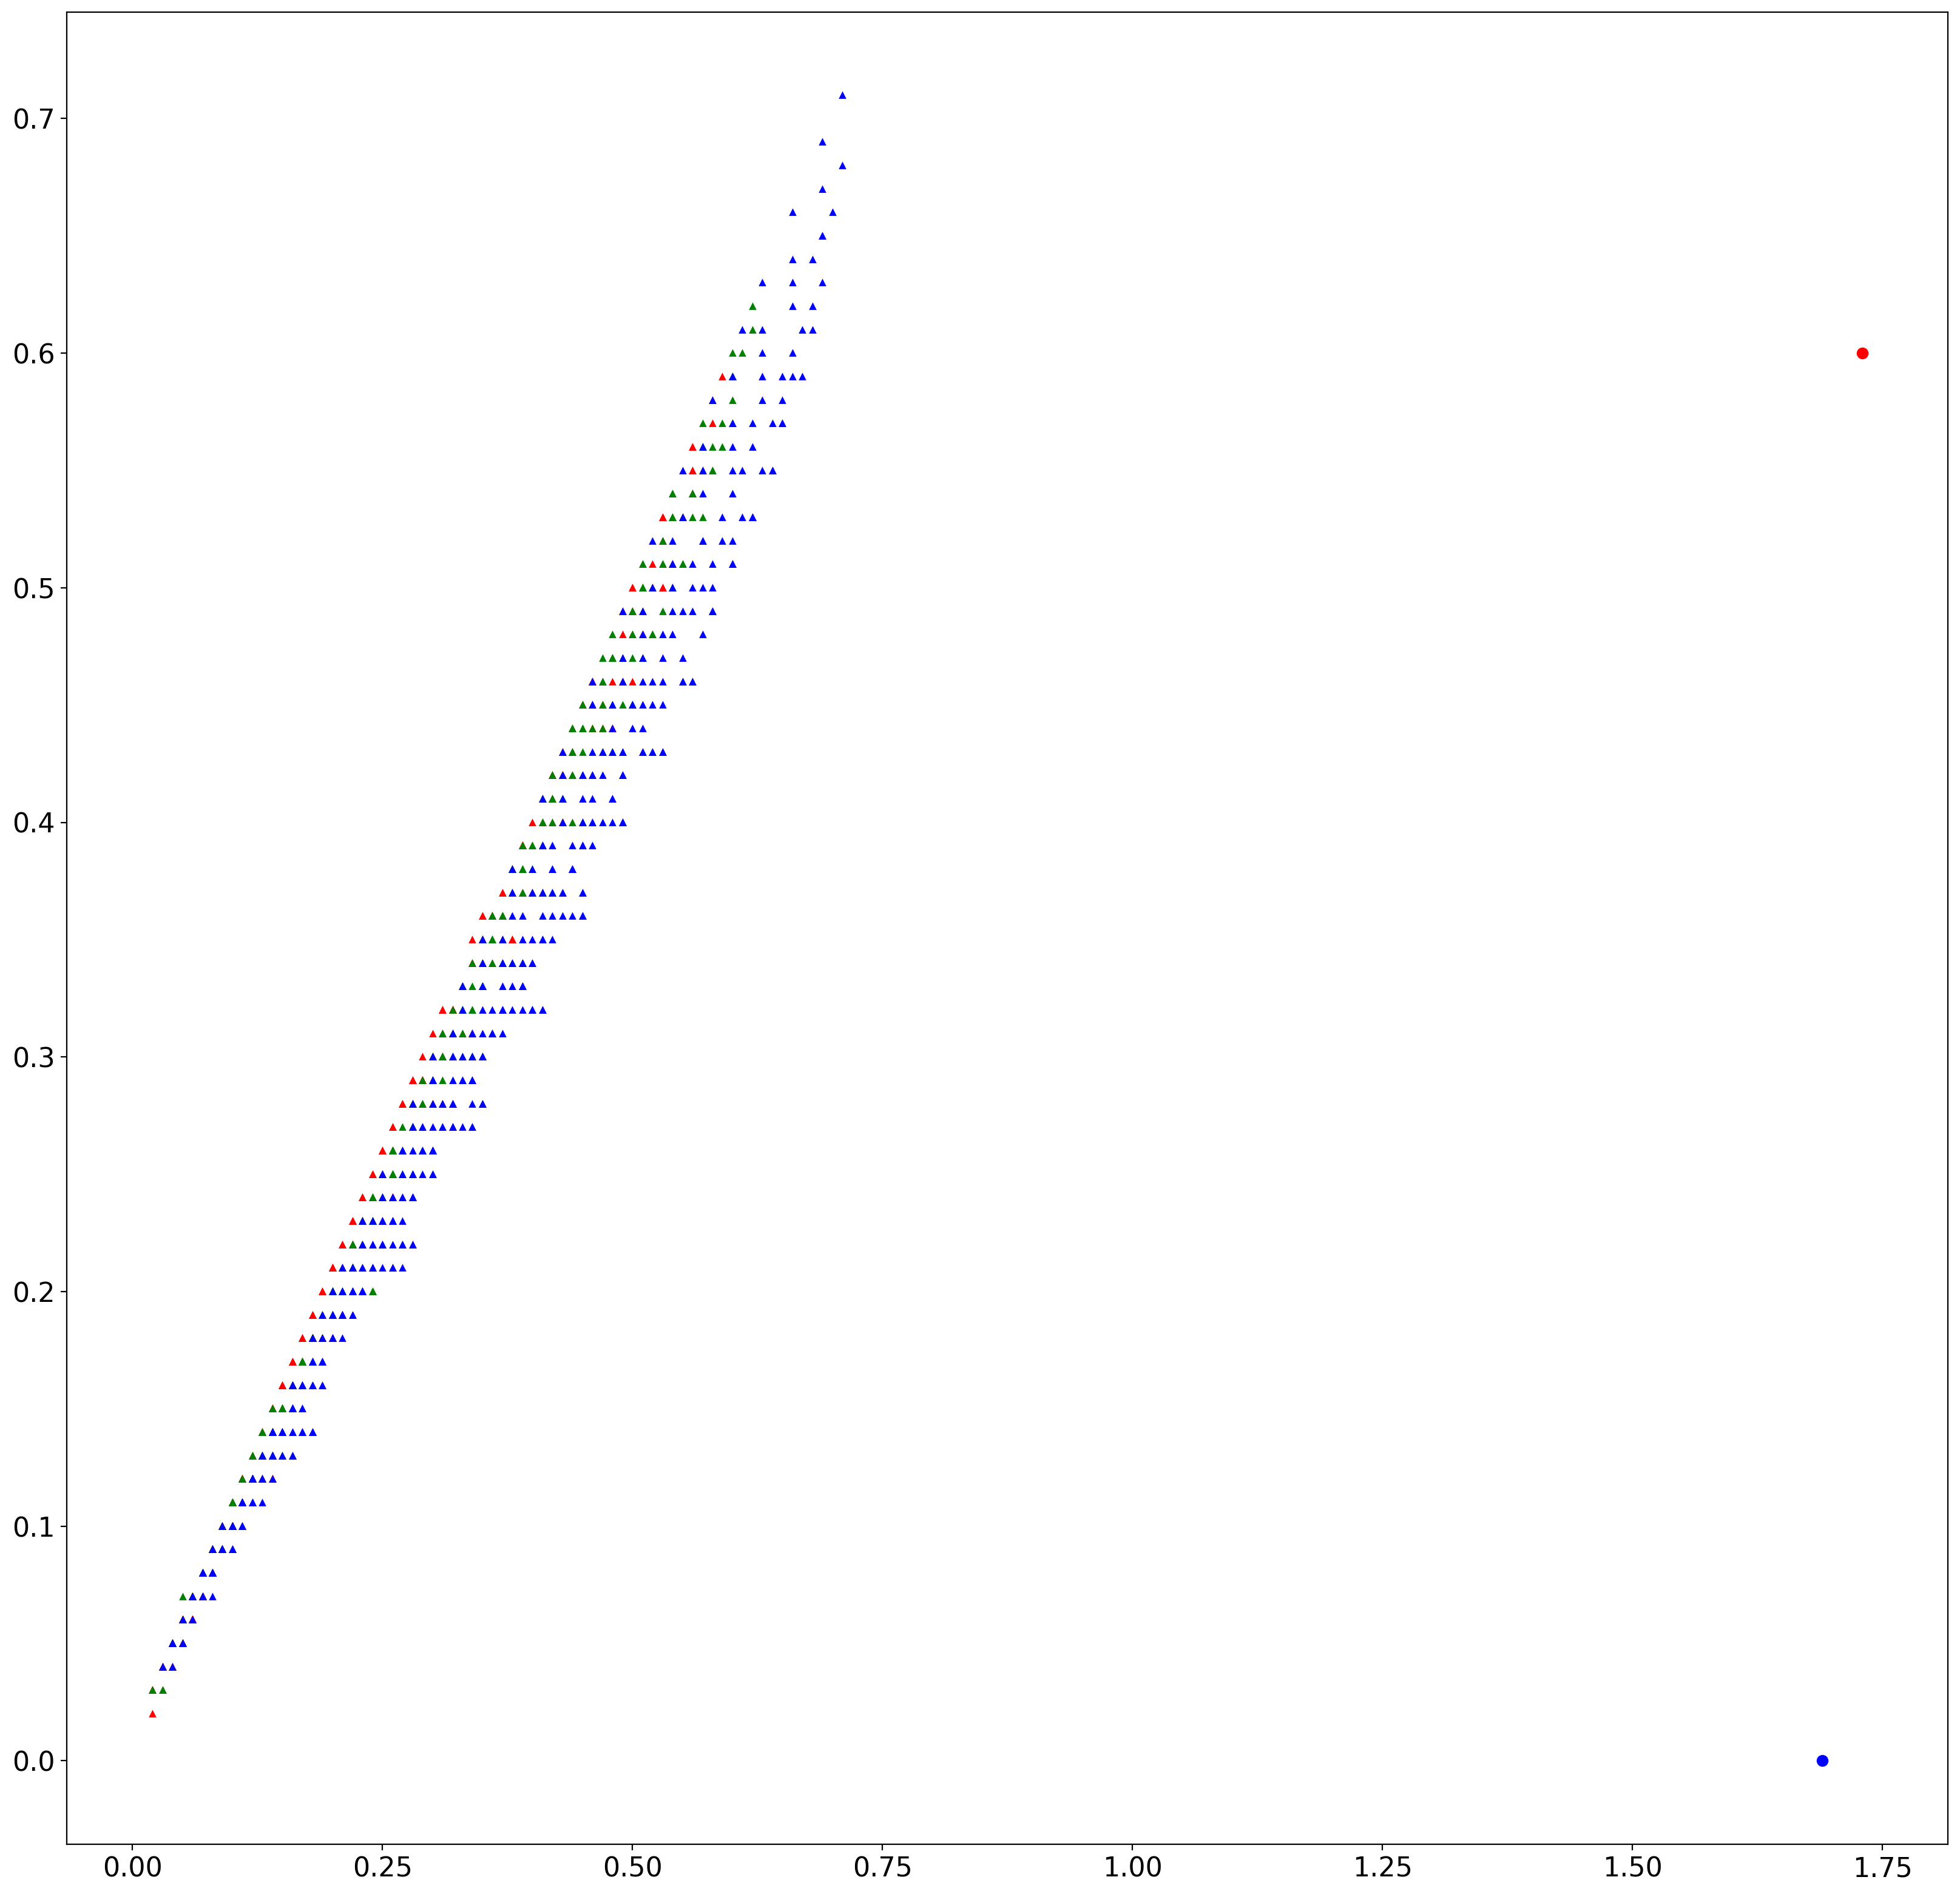

In [22]:
deltas_a = deltas[deltas.f == 0.0]
deltas_b = deltas[deltas.f == 0.5]
deltas_c = deltas[deltas.f == 1.0]

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111)
ax1.plot(deltas_a.Pri, deltas_a.Sec, 'r', **plot_kwargs)
ax1.plot(deltas_b.Pri, deltas_b.Sec, 'g', **plot_kwargs)
ax1.plot(deltas_c.Pri, deltas_c.Sec, 'b', **plot_kwargs)

ax1.plot(1.73, 0.6, 'ro')
ax1.plot(1.69, 0, 'bo')